**Project Title: Efficient Data Stream Anomaly Detection**

**Background information**: In today's data-driven world, real-time data streams are integral to various domains, including financial transactions, system metrics, and more. The continuous influx of data necessitates robust methods to identify anomalies that could indicate potential issues, fraud, or system failures. 

**Objective**: The primary objective of this research project is to design and implement a Python-based solution that can detect anomalies in a real-time continuous data stream.
                    

In [170]:
%matplotlib notebook
%matplotlib inline


In [172]:
#All necessary imports included - we ensure to limit the use of external libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import deque 
from IPython.display import display, clear_output
import time



The code initializes two deques, x_data and y_data, each with a maximum length of 100, to manage and automatically maintain the most recent 100 time series data points for x and y variables, respectively. 

*The x values represent the independent variable which is time.

*The y values represent the dependent varaible which may be data values representing: 

* financial metrics
* sensor readings
* or other measured values for example 

In [175]:
# Initialize data using deque to keep only the last 100 data points
xData = deque(maxlen=100)
yData = deque(maxlen=100)

In [177]:
# Configure the figure and axis setup.
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-', label='Data Stream')
ax.set_xlim(0, 100)
ax.set_ylim(-3, 3)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Real-time Data Stream with Patterns, Seasonal Elements, and Noise')
ax.legend()

Define a function called simulateDataStream which does the following: 

* The function takes a sinlgle parameter which is time - representing the time at which a data point is generated.
* Thus the objective of the function is to generate a data point that combines a:
* regular cyclic pattern ,
* seasonal variation,
* and random noise.
  

In [180]:
def simulateDataStream(t):
    """Generate a data point incorporating regular patterns, seasonal elements, and random noise."""
    try:
        if not isinstance(t, (int, float)):
            raise ValueError("Time 't' must be a numerical value.")
        
        RegPattern = np.sin(2 * np.pi * 0.05 * t) # Creates a smooth, repeating pattern based on a sine wave.
        SeasonalVar=np.sin(2 * np.pi * 0.01 * t) #Creates a slower, longer-term variation with a sine wave.
        Noise = np.random.normal(0, 0.5)            	#Generates random fluctuations around 0 with a standard deviation of 0.5.
        RSN= RegPattern + SeasonalVar + Noise  #Sum the regPattern , SeasonalVar, Noise to get a data point that has all three components
        return RSN

    
    except ValueError as e:
        print(f"ValueError: {e}")
        return np.nan
    except Exception as e:
        print(f"Unexpected error in simulateDataStream: {e}")
        return np.nan


Update the plot with the new data points from the simulated data stream

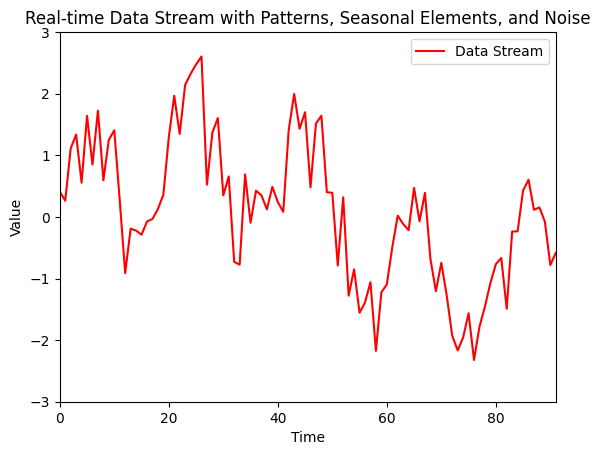

In [ ]:
def update_plot():
    """Update the plot with new data points from the simulated data stream."""
    for t in range(200):
        xData.append(t)
        y = simulateDataStream(t)
        yData.append(y)
        
        # Calculate rolling mean and standard deviation
        if len(yData) > 1:
            mean = np.mean(yData)
            std = np.std(yData)
        else:
            mean, std = y, 0
        
        # Update the line with the most recent data
        line.set_data(xData, yData)
        
        # Adjust x-axis limit dynamically
        ax.set_xlim(xData[0], xData[-1])
        
        # Recalculate limits and rescale the view
        ax.relim()
        ax.autoscale_view()
        
        # Clear the previous plot and display the updated one
        clear_output(wait=True)
        display(fig)
        
        # Reduce the sleep time for faster updates
        time.sleep(0.01)

# Run the update function to start plotting
update_plot()





The EWMA anomaly detection method excels by integrating Exponentially Weighted Moving Average (EWMA) with adaptive thresholding to effectively identify anomalies in time series data. EWMA provides a responsive smoothing mechanism that prioritizes recent observations, enhancing the detection of deviations from current trends.

By utilizing a dynamic threshold based on the rolling standard deviation, this method adapts to variations in data variability, improving precision and reducing false positives compared to static threshold techniques. Its efficiency and capability to handle non-stationary data make it a strong choice for real-time monitoring and complex datasets, effectively combining adaptability and performance.

In [ ]:
# Define parameters
alpha = 0.1
#  the parameter αlpha is the smoothing factor that controls the weight given to the most recent observation compared to past observations.
ewma = None  # Initial state before the data is updated 

# Define Adaptive threshold parameters
threshFac = 3  # Multiplier for the standard deviation to set the threshold. 3 is chosen 
rollingStd = deque(maxlen=100) # Maintains a fixed-size window of deviations to compute the rolling standard deviation.



def EMWA_Detection(y, ewma, rollingStd, threshFac): # Detect anomalies using the EWMA method with an adaptive threshold
   
    if ewma is None:
        ewma = y  # Initialize EWMA with the first data point
    else:
        ewma = alpha * y + (1 - alpha) * ewma  # Update the EMWA
    
    rollingStd.append(abs(y - ewma))  # Update the rolling standard deviation
    std_dev = np.std(rollingStd) if len(rollingStd) > 1 else 0
    threshold = threshFac * std_dev
    
    # Detect if the current point is an anomaly
    is_anomaly = abs(y - ewma) > threshold
    return ewma, is_anomaly




In [ ]:
def update_plot():  #Update the plot with new data points from the simulated data stream. 
    
    global ewma
    for t in range(200):
        x_data.append(t)
        y = simulate_data_point(t)
        y_data.append(y)
        
        # Apply EWMA anomaly detection
        ewma, is_anomaly =  EMWA_Detection(y, ewma, rollingStd, threshFac)
        
        # If an anomaly is detected-it is appended to the anomalies list
        if is_anomaly:
            anomalies_x.append(t)
            anomalies_y.append(y)
        
        # Update the line with the most recent data
        line.set_data(x_data, y_data)
        anomaly_line.set_data(anomalies_x, anomalies_y)
        
        # Adjust x-axis limit dynamically
        ax.set_xlim(x_data[0], x_data[-1])
        
        # Recalculate limits and rescale the view
        ax.relim()
        ax.autoscale_view()
        
        
        clear_output(wait=True)
        display(fig)
        
        # Reduce the sleep time for faster updates
        time.sleep(0.05)

#Run the update function again to start plotiing 
update_plot()

**In essence, the EWMA anomaly detection method, with its adaptive threshold set by a factor of 3, strikes a masterful balance between precision and flexibility. It dynamically adjusts to data fluctuations, ensuring reliable anomaly detection with minimal false positives. This efficient, real-time approach is a sharp tool for navigating complex data landscapes, delivering accurate insights where they matter most.**